<a href="https://www.kaggle.com/code/sanjay7013/imdb-sentiment-analysis-using-bow-tf-idf-word2vec?scriptVersionId=99242153" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# IMDB Sentiment Analysis Using BagOfWords,TF-IDF,Word2Vec

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. The Dataset consists of 25,000 highly polar movie reviews for training and 25,000 for testing. So, We are going to predict the number of positive and negative reviews using classification ML algorithms.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/640px-IMDB_Logo_2016.svg.png"></center>

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
df = pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Now Let's convert the sentiment column values to numerical values by a simple python list comprehension expression which is given below.

In [4]:
df['sentiment'] = [1 if sentiment == 'positive' else 0 for sentiment in df['sentiment']]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Initial Data Analysis

In [5]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

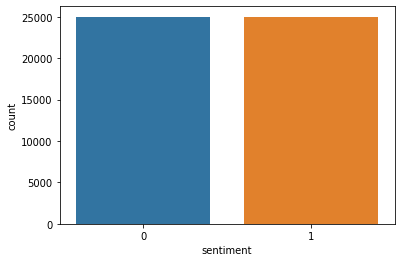

In [6]:
sns.countplot(df['sentiment'])

In [7]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

As we have the equal number of positive and negative reviews, we can say that the dataset is very well balanced.

# Text Preprocessing

In [8]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

As this is sentiment analysis we can use Stemming instead of Lemmatization.

To know about when to use stemming and lemmatization see below-

<b>Stemmming</b> = Spam classification, Review classification

<b>Lemmatization</b> = Text summarization, Language translation, chatbot

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

Now we are going to apply stemming to all the sentences in the Dataset and we are also going to remove stopwords after converting all the words in the dataset to lowercase. After that we are going to store these sentences in a list named "corpus".

In [11]:
from tqdm import tqdm
corpus = []
for i in tqdm(range(0,len(df))):
    sentence = re.sub('[^a-zA-Z]',' ',df['review'][i]) ## each review is each sentence
    sentence = sentence.lower() ## Lower casing the words in each sentence
    sentence = sentence.split() ## splitting sentences to words and storing it as a list of words
    sentence = [ps.stem(word) for word in sentence if not word in stopwords.words('english')]  ## Removing stop words and applying stemming 
    sentence = ' '.join(sentence)  ## Joining words again to form the sentences
    corpus.append(sentence) ### storing each sentences to corpus

100%|██████████| 50000/50000 [30:40<00:00, 27.17it/s]


In [12]:
## corpus  ## If u want to see the corpus

# 1. Bag of Words Model

In [13]:
## Creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X1 = cv.fit_transform(corpus).toarray()

In [15]:
y1 = pd.get_dummies(df['sentiment'])
y1 = y1.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size = 0.20, random_state=0)

In [38]:
X_train1.shape

(40000, 2500)

In [39]:
y_train1.shape

(40000,)

In [17]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train1,y_train1)

In [20]:
y_pred1 = model1.predict(X_test1)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test1,y_pred1))
print(classification_report(y_pred1,y_test1))

0.8369
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.83      0.84      0.84      4948

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Making a New Prediction

In [83]:
new_review = 'I love this movie so much. It\'s really great'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model1.predict(new_X_test)
print(new_y_pred)

[1]


# 2. TF-IDF

In [23]:
## Creating tf-idf model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X2 = tv.fit_transform(corpus).toarray()

In [33]:
y2=pd.get_dummies(df['sentiment'])
y2=y2.iloc[:,1].values

In [47]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.20, random_state=0)

In [48]:
X_train2.shape

(40000, 2500)

In [49]:
y_train2.shape

(40000,)

In [50]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB().fit(X_train2, y_train2)

In [51]:
y_pred2 = model2.predict(X_test2)

In [52]:
print(accuracy_score(y_test2,y_pred2))
print(classification_report(y_pred2,y_test2))

0.8448
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4923
           1       0.85      0.84      0.85      5077

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



## Making a New Prediction

In [84]:
new_review = 'I Hate this movie so much. It\'s ok.'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model2.predict(new_X_test)
print(new_y_pred)

[0]


# 3. Word2Vec

In [54]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[===================================---------------] 70.4% 1170.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.2% 1250.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.4% 1370.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.5% 1388.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.7% 1442.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.2% 1500.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.0% 1563.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 97.5% 1621.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [55]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [56]:
from tqdm import tqdm
corpus1 = []
for i in tqdm(range(0,len(df))):
    sentence = re.sub('[^a-zA-Z]',' ',df['review'][i]) ## each review is each sentence
    sentence = sentence.lower() ## Lower casing the words in each sentence
    sentence = sentence.split() ## splitting sentences to words and storing it as a list of words
    sentence = [lemmatizer.lemmatize(word) for word in sentence if not word in stopwords.words('english')]  ## Removing stop words and applying Lemmatizer 
    sentence = ' '.join(sentence)  ## Joining words again to form the sentences
    corpus1.append(sentence) ### storing each sentences to corpus

100%|██████████| 50000/50000 [28:09<00:00, 29.59it/s]


In [57]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [58]:
words = []
for sent in corpus1:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [59]:
#words  ## to see the nested words list

In [60]:
import gensim
model3 = gensim.models.Word2Vec(words,window=5,min_count=2)

In [62]:
## model3.wv.index_to_key

In [63]:
model3.corpus_count

50000

In [64]:
model3.epochs

5

In [69]:
def avg_word2vec(doc):
    return np.mean([model3.wv[word] for word in doc if word in model3.wv.index_to_key], axis=0)

In [71]:
X3 = []
for i in tqdm(range(len(words))):
    X3.append(avg_word2vec(words[i]))

100%|██████████| 50000/50000 [15:26<00:00, 53.98it/s]


In [72]:
type(X3)

list

In [73]:
X_new = np.array(X3)

In [74]:
X_new.shape

(50000, 100)

In [75]:
y3=pd.get_dummies(df['sentiment'])
y3=y3.iloc[:,1].values

In [76]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new,y3, test_size=0.20, random_state=0)

In [77]:
X_train3.shape

(40000, 100)

In [78]:
y_train3.shape

(40000,)

In [80]:
from sklearn.svm import SVC
model4 = SVC(kernel='rbf', random_state=0).fit(X_train3, y_train3)

In [81]:
y_pred3 = model4.predict(X_test3)

In [82]:
print(accuracy_score(y_test3,y_pred3))
print(classification_report(y_pred3,y_test3))

0.866
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4951
           1       0.87      0.86      0.87      5049

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Making a New Prediction

In [93]:
new_review = 'The Dr.Strange MOM movie was great.'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [lemmatizer.lemmatize(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]

new_words=[]
for sent in new_corpus:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        new_words.append(simple_preprocess(sent))
        
new_X3 = []
for i in range(len(new_words)):
    new_X3.append(avg_word2vec(new_words[i]))
    
new_X = np.array(new_X3)
new_y_pred = model4.predict(new_X)
print(new_y_pred)

[1]
